# Préparez des données pour un organisme de santé publique

## Santé publique France

![Santé Publique France](data/images/Sante-publique-France-logo.png)

L'agence "Santé publique France" a lancé un appel à projets pour rendre les données de santé plus accessibles. L’agence souhaite faire explorer et visualiser des données, pour que ses agents puissent les exploiter.


## Open Food Facts

![Open Food Facts](data/images/OpenFoodFacts.png)

À l’aide des données d’Open Food Facts, nous réaliserons une première exploration et visualisation des données, afin que les agents puissent ensuite s’appuyer sur nos résultats.

### Importations

Importation de bibliothèques et des paramètres.

In [1]:
# Manipulation de données
from IPython import get_ipython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher toutes les sorties de cellule
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

ipython = get_ipython()

# extension de chargement automatique
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Analyse / Modélisation

Cet ensemble de données contient la valeur nutritive des aliments pour plus de 100 000 produits alimentaires provenant de 150 pays.

![Open Food Facts](data/images/prince.jpg)

Chargement du jeu de données

In [2]:
df = pd.read_csv(
    "data/fr.openfoodfacts.org.products.csv",
    delimiter='\t',
    encoding='utf-8',
    low_memory=False)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(
    f"Le fichier est constitué de {df.shape[0]} lignes et de {df.shape[1]} colonnes."
)

Le fichier est constitué de 320772 lignes et de 162 colonnes.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


<AxesSubplot:ylabel='None'>

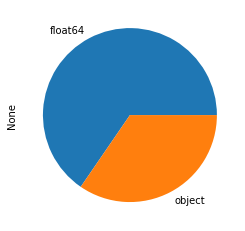

In [5]:
df.dtypes.value_counts().plot.pie()

In [6]:
df.isnull().sum().sort_values()

last_modified_t                               0
last_modified_datetime                        0
creator                                       2
created_t                                     3
created_datetime                              9
                                          ...  
ingredients_that_may_be_from_palm_oil    320772
ingredients_from_palm_oil                320772
no_nutriments                            320772
nervonic-acid_100g                       320772
water-hardness_100g                      320772
Length: 162, dtype: int64

<AxesSubplot:ylabel='Frequency'>

Text(0.5, 1.0, 'Distribution de NaNs')

Text(0.5, 0, 'NaNs')

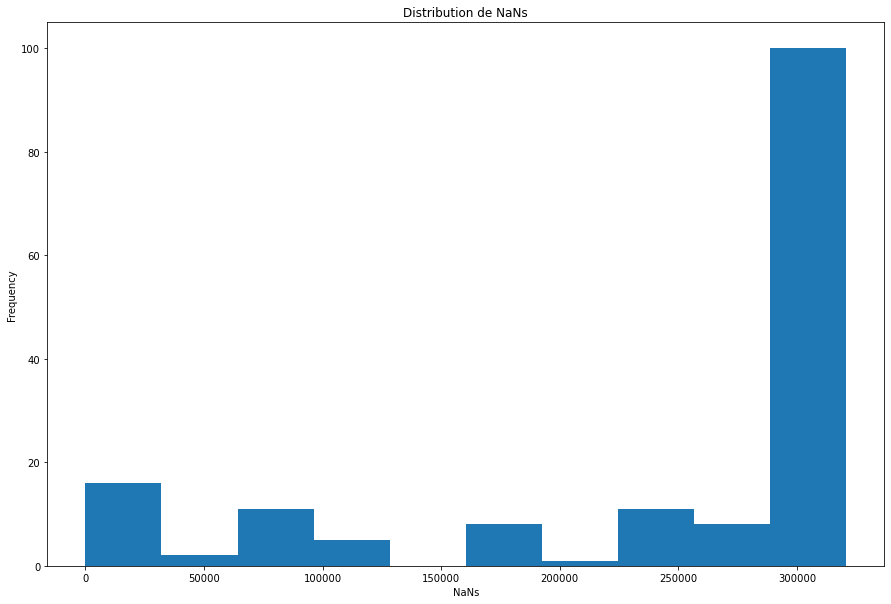

In [7]:
df.isnull().sum().plot(kind='hist', figsize=(15, 10))
plt.title('Distribution de NaNs')
plt.xlabel('NaNs')

plt.show()

In [8]:
# Nous supprimons toutes les colonnes contenant moins de 20% de données utilisables
df = df.dropna(axis=1, thresh=len(df)*0.2, how='all')

In [9]:
# Supprimer toutes les lignes qui (après avoir supprimé certaines colonnes) ne contiennent que des NaN
df = df.dropna(axis=0, how='all')

In [10]:
print(
    f'Il y a maintenant {df.shape[0]} lignes et {df.shape[1]} colonnes restantes dans nos données')

Il y a maintenant 320772 lignes et 54 colonnes restantes dans nos données


In [11]:
df.isnull().sum().sort_values()

last_modified_t                                 0
last_modified_datetime                          0
creator                                         2
created_t                                       3
created_datetime                                9
code                                           23
url                                            23
states_fr                                      46
states_tags                                    46
states                                         46
countries_fr                                  280
countries_tags                                280
countries                                     280
product_name                                17762
brands                                      28412
brands_tags                                 28420
energy_100g                                 59659
proteins_100g                               60850
salt_100g                                   65262
sodium_100g                                 65309


<Figure size 2160x1440 with 0 Axes>

<AxesSubplot:>

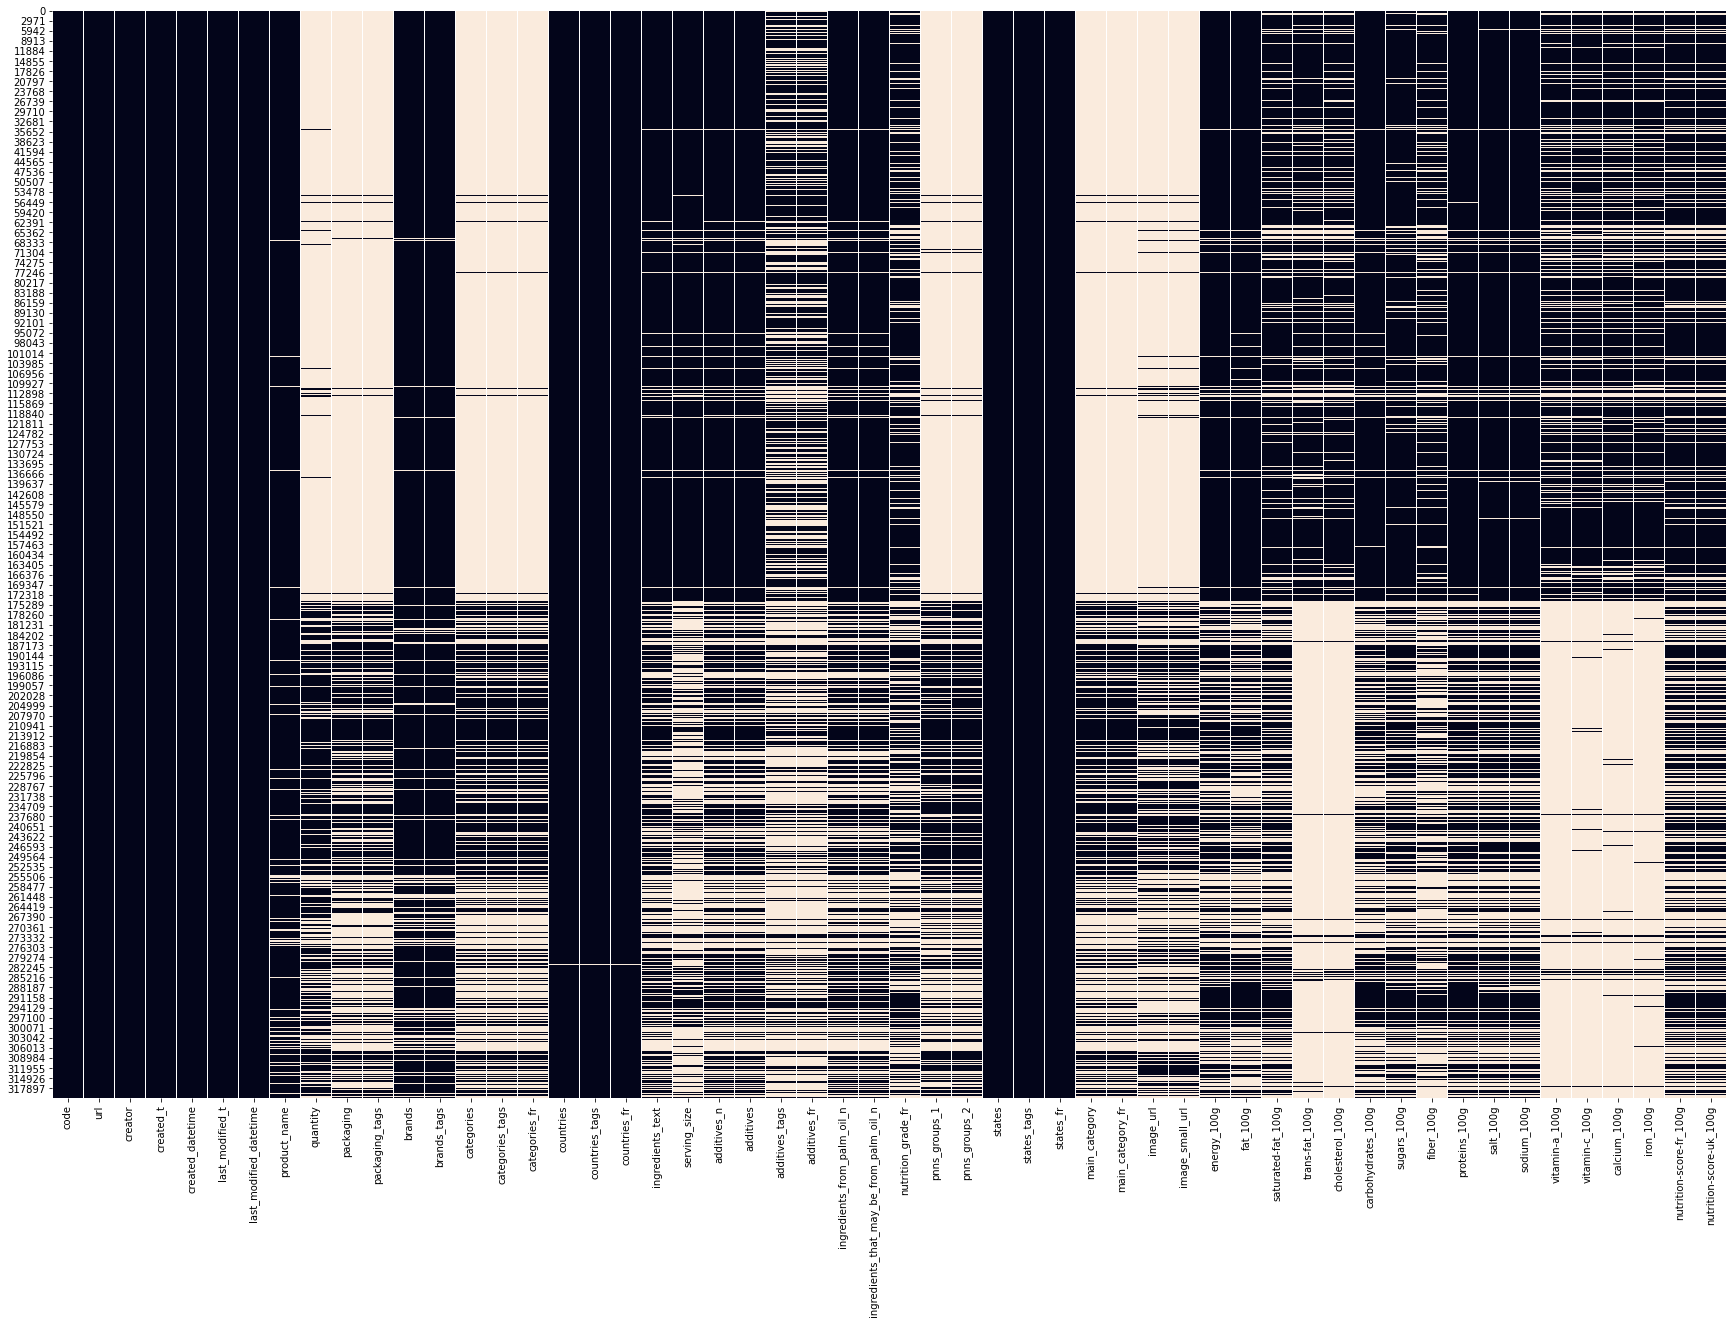

In [12]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.isna(), cbar=False)

In [13]:
# Nous supprimons toutes les colonnes que nous ne jugeons pas intéressantes et que nous
# n'avons pas l'intention d'utiliser pour notre enquête.
df = df.drop(columns=['creator',
                      'brands',
                      'brands_tags',
                      'categories',
                      'main_category',
                      'countries',
                      'countries_tags',
                      'additives',
                      'additives_tags',
                      'categories_tags',
                      'states',
                      'states_tags',
                      'url',
                      'quantity',
                      'packaging_tags',
                      'packaging',
                      'created_t',
                      'last_modified_t',
                      'ingredients_from_palm_oil_n',
                      'ingredients_that_may_be_from_palm_oil_n',
                      'pnns_groups_1',
                      'pnns_groups_2',
                      'image_url',
                      'image_small_url',
                      ])

In [14]:
print(
    f'Il y a maintenant {df.shape[0]} lignes et {df.shape[1]} colonnes restantes dans nos données')

Il y a maintenant 320772 lignes et 30 colonnes restantes dans nos données


In [15]:
df.columns

Index(['code', 'created_datetime', 'last_modified_datetime', 'product_name',
       'categories_fr', 'countries_fr', 'ingredients_text', 'serving_size',
       'additives_n', 'additives_fr', 'nutrition_grade_fr', 'states_fr',
       'main_category_fr', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g',
       'iron_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'],
      dtype='object')

In [16]:
df.duplicated().sum()

0

In [17]:
df.dtypes

code                        object
created_datetime            object
last_modified_datetime      object
product_name                object
categories_fr               object
countries_fr                object
ingredients_text            object
serving_size                object
additives_n                float64
additives_fr                object
nutrition_grade_fr          object
states_fr                   object
main_category_fr            object
energy_100g                float64
fat_100g                   float64
saturated-fat_100g         float64
trans-fat_100g             float64
cholesterol_100g           float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
vitamin-a_100g             float64
vitamin-c_100g             float64
calcium_100g               float64
iron_100g                  float64
nutrition-score-fr_1

In [18]:
df['created_datetime'] = pd.to_datetime(
    df['created_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [19]:
df['last_modified_datetime'] = pd.to_datetime(
    df['last_modified_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [20]:
df[['created_datetime', 'last_modified_datetime']].isnull().sum()

created_datetime          24
last_modified_datetime    23
dtype: int64

In [21]:
# Nous remplissons les NaNs
df['created_datetime'].fillna(method='ffill', inplace=True)
df['last_modified_datetime'].fillna(method='ffill', inplace=True)

In [22]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,2.611130e+05,243891.000000,229554.000000,143298.000000,144090.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000,221210.000000,221210.000000
mean,1.936024,1.141915e+03,12.730379,5.129932,0.073476,0.020071,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652,9.165535,9.058049
std,2.502019,6.447154e+03,17.578747,8.014238,1.540223,0.358062,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408,9.055903,9.183589
min,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,3.770000e+02,0.000000,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.100000e+03,5.000000,1.790000,0.000000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010,10.000000,9.000000
75%,3.000000,1.674000e+03,20.000000,7.140000,0.000000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400,16.000000,16.000000
max,31.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


Une inspection plus approfondie des valeurs min et max révèle qu'il y a des erreurs évidentes dans nos données.

additives_n                   AxesSubplot(0.125,0.772143;0.168478x0.107857)
energy_100g                AxesSubplot(0.327174,0.772143;0.168478x0.107857)
fat_100g                   AxesSubplot(0.529348,0.772143;0.168478x0.107857)
saturated-fat_100g         AxesSubplot(0.731522,0.772143;0.168478x0.107857)
trans-fat_100g                AxesSubplot(0.125,0.642714;0.168478x0.107857)
cholesterol_100g           AxesSubplot(0.327174,0.642714;0.168478x0.107857)
carbohydrates_100g         AxesSubplot(0.529348,0.642714;0.168478x0.107857)
sugars_100g                AxesSubplot(0.731522,0.642714;0.168478x0.107857)
fiber_100g                    AxesSubplot(0.125,0.513286;0.168478x0.107857)
proteins_100g              AxesSubplot(0.327174,0.513286;0.168478x0.107857)
salt_100g                  AxesSubplot(0.529348,0.513286;0.168478x0.107857)
sodium_100g                AxesSubplot(0.731522,0.513286;0.168478x0.107857)
vitamin-a_100g                AxesSubplot(0.125,0.383857;0.168478x0.107857)
vitamin-c_10

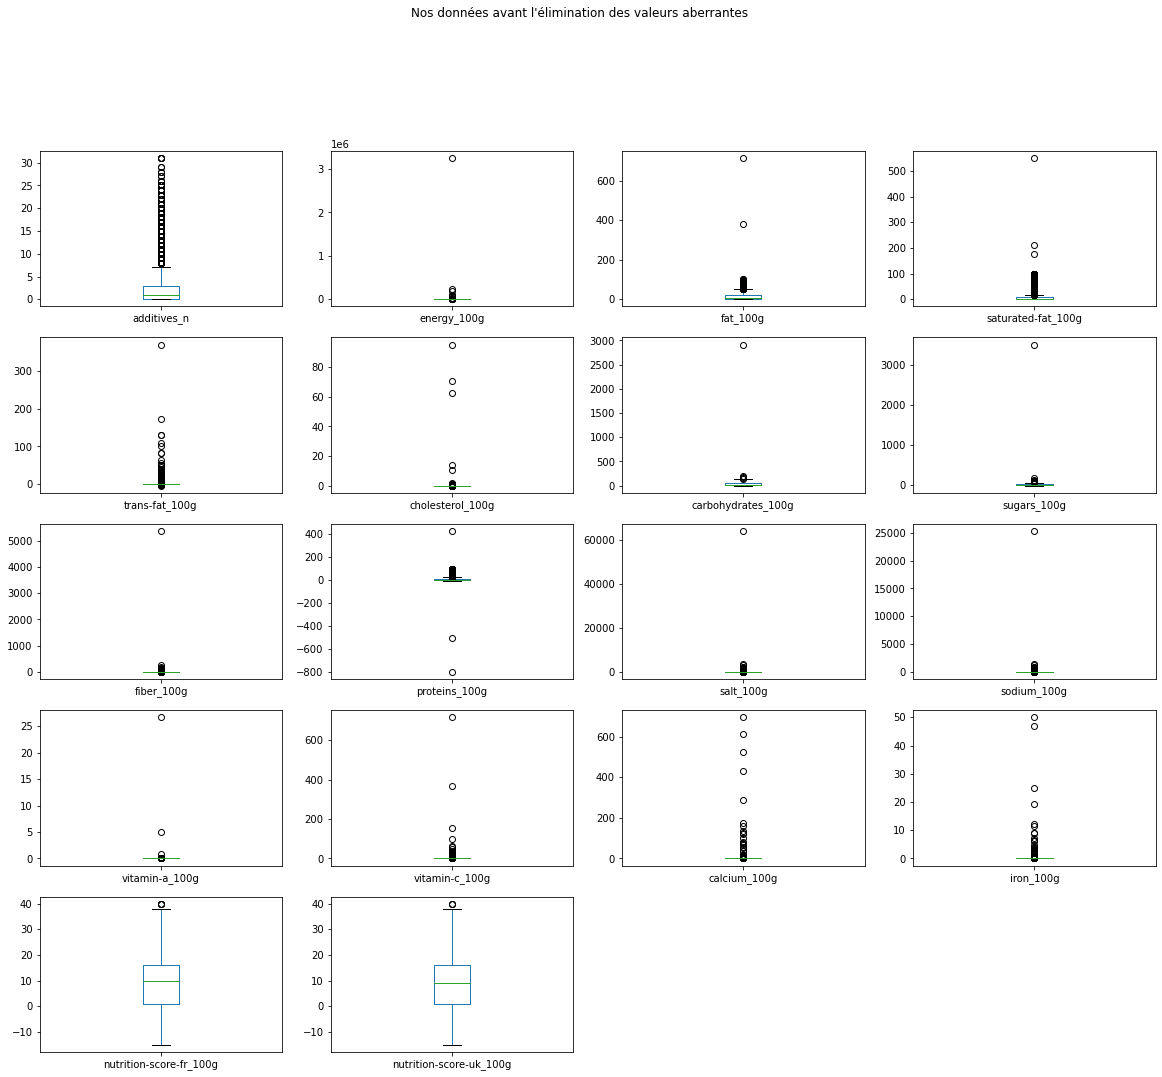

In [23]:
df.select_dtypes(include=float).plot(kind='box', subplots=True,
                                     title="Nos données avant l'élimination des valeurs aberrantes", figsize=(20, 20), layout=(6, 4))

plt.show()

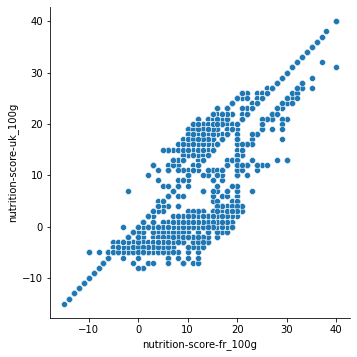

In [24]:
sns.pairplot(df, x_vars=['nutrition-score-fr_100g'],
             y_vars=['nutrition-score-uk_100g'], height=5)

plt.show()

Nous allons maintenant éliminer toutes les lignes, qui contiennent des valeurs impossibles par définition.

In [25]:
df = df[(df['fat_100g'] + df['carbohydrates_100g'] + df['proteins_100g']) <= 100]

In [26]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,229710.000000,2.394200e+05,239834.000000,209090.000000,141016.000000,141630.000000,239834.000000,224323.000000,180793.000000,239834.000000,234462.000000,234430.000000,135222.000000,138415.000000,138442.000000,138032.000000,201726.000000,201726.000000
mean,2.006722,1.131299e+03,12.521353,5.015387,0.071958,0.020181,31.788985,15.935539,2.865780,6.961542,2.072193,0.815933,0.000399,0.016189,0.120607,0.003661,9.098520,9.002345
std,2.522243,6.707383e+03,17.318245,7.656109,1.543594,0.361108,29.025146,21.084148,4.481197,8.252054,133.870608,52.708559,0.073907,1.120749,3.022606,0.216285,9.043949,9.170517
min,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,0.000000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,3.700000e+02,0.000000,0.000000,0.000000,0.000000,5.880000,1.400000,0.000000,0.590000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.088000e+03,4.900000,1.790000,0.000000,0.000000,20.000000,5.750000,1.600000,4.620000,0.591820,0.233000,0.000000,0.000000,0.035000,0.000990,10.000000,9.000000
75%,3.000000,1.674000e+03,20.000000,7.140000,0.000000,0.021000,57.890000,23.905000,3.600000,10.000000,1.397000,0.550000,0.000107,0.003700,0.106000,0.002400,16.000000,16.000000
max,31.000000,3.251373e+06,100.000000,100.000000,369.000000,95.238000,100.000000,100.000000,178.000000,100.000000,64312.800000,25320.000000,26.700000,370.370400,694.737000,50.000000,40.000000,36.000000


additives_n                   AxesSubplot(0.125,0.772143;0.168478x0.107857)
energy_100g                AxesSubplot(0.327174,0.772143;0.168478x0.107857)
fat_100g                   AxesSubplot(0.529348,0.772143;0.168478x0.107857)
saturated-fat_100g         AxesSubplot(0.731522,0.772143;0.168478x0.107857)
trans-fat_100g                AxesSubplot(0.125,0.642714;0.168478x0.107857)
cholesterol_100g           AxesSubplot(0.327174,0.642714;0.168478x0.107857)
carbohydrates_100g         AxesSubplot(0.529348,0.642714;0.168478x0.107857)
sugars_100g                AxesSubplot(0.731522,0.642714;0.168478x0.107857)
fiber_100g                    AxesSubplot(0.125,0.513286;0.168478x0.107857)
proteins_100g              AxesSubplot(0.327174,0.513286;0.168478x0.107857)
salt_100g                  AxesSubplot(0.529348,0.513286;0.168478x0.107857)
sodium_100g                AxesSubplot(0.731522,0.513286;0.168478x0.107857)
vitamin-a_100g                AxesSubplot(0.125,0.383857;0.168478x0.107857)
vitamin-c_10

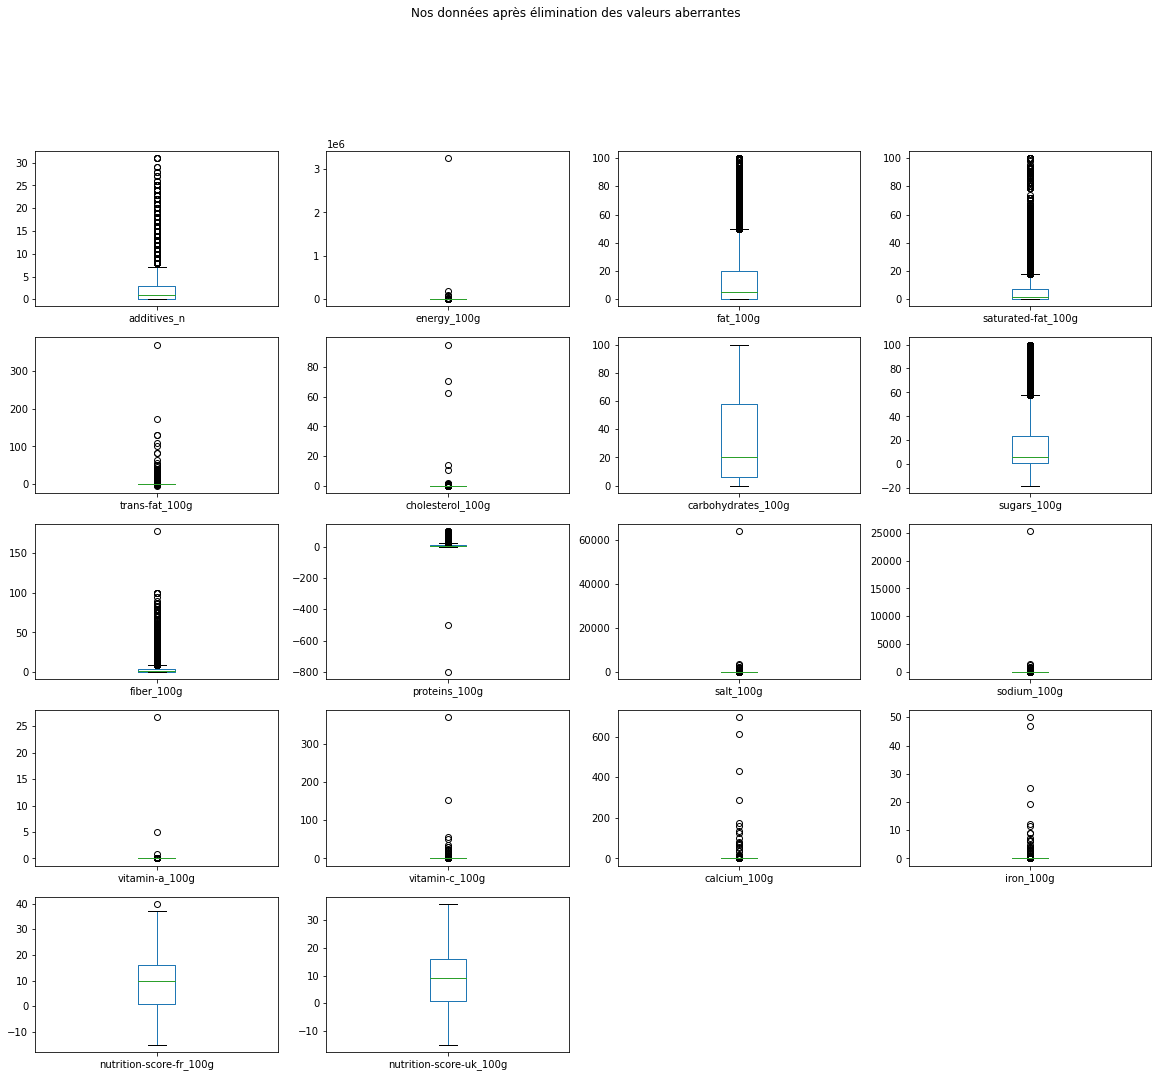

In [27]:
df.select_dtypes(include=float).plot(kind='box', subplots=True,
                                     title='Nos données après élimination des valeurs aberrantes', figsize=(20, 20), layout=(6, 4))

plt.show()

# Pré-traitement des données

Suppression des colonnes non nécessaire

# Résultats

# Conclusions et prochaines étapes